# Analyse MibiTOF in Napari-SpatialData 


This tutorial shows how to load and analyse the MibiTOF dataset with the Napari-SpatialData plugin.


## Import packages and data

There are two options to install napari-spatialdata:

(1) Run `pip install napari-spatialdata`

or, 

(2) Clone this [repo](https://github.com/scverse/napari-spatialdata) and run `pip install -e .`

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from napari_spatialdata import Interactive
from spatialdata import SpatialData
import squidpy as sq
import scanpy as sc

plt.rcParams['figure.figsize'] = (20, 20)

Next, we will download the Nanostring dataset (cosmx_io) for analysis. Uncomment the lines below to download the dataset. 

In [4]:
!mkdir tutorial_data
!mkdir tutorial_data/mibitof_data
!wget -P tutorial_data/mibitof_data https://s3.embl.de/spatialdata/spatialdata-sandbox/mibitof.zip
!tar -xzf tutorial_data/mibitof_data/mibitof.zip -C tutorial_data/mibitof_data/.

mkdir: tutorial_data: File exists
mkdir: tutorial_data/mibitof_data: File exists
--2023-05-04 12:28:27--  https://s3.embl.de/spatialdata/spatialdata-sandbox/mibitof.zip
Resolving s3.embl.de (s3.embl.de)... 194.94.45.80
Connecting to s3.embl.de (s3.embl.de)|194.94.45.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8108095 (7,7M) [application/zip]
Saving to: ‘tutorial_data/mibitof_data/mibitof.zip.2’

mibitof.zip.2       100%[===================>]   7,73M  7,01MB/s    in 1,1s    

2023-05-04 12:28:29 (7,01 MB/s) - ‘tutorial_data/mibitof_data/mibitof.zip.2’ saved [8108095/8108095]



We will load the dataset from the filepath and create a {class}`spatialdata.SpatialData` object. We'll use this object with the class `Interactive` to visualise this dataset in Napari.

In [5]:
sdata = SpatialData.read("tutorial_data/mibitof_data/data.zarr")

## Visualise in napari

To make it easier to analyse our data, we will filter the SpatialData object by the coordinate system "point8".

In [6]:
sdata = sdata.filter_by_coordinate_system("point8")
adata = sdata.table

The `scikit-misc package` could be required for highly variable genes identification.

Next, we will use the Scatter Widget offered by Napari SpatialData to visualise the UMAP coordinates.

First, we instantiate the `Interactive` class with our {class}`spatialdata.SpatialData` object, and view it in Napari.

In [20]:
interactive = Interactive(sdata)
interactive.run()

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:107: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
2023-05-04 12:32:47.918 | INFO     | napari_spatialdata._scatterwidgets:plot:253 - Plotting coordinates.


(-0.5, 2559.5, 1601.5, -0.5)

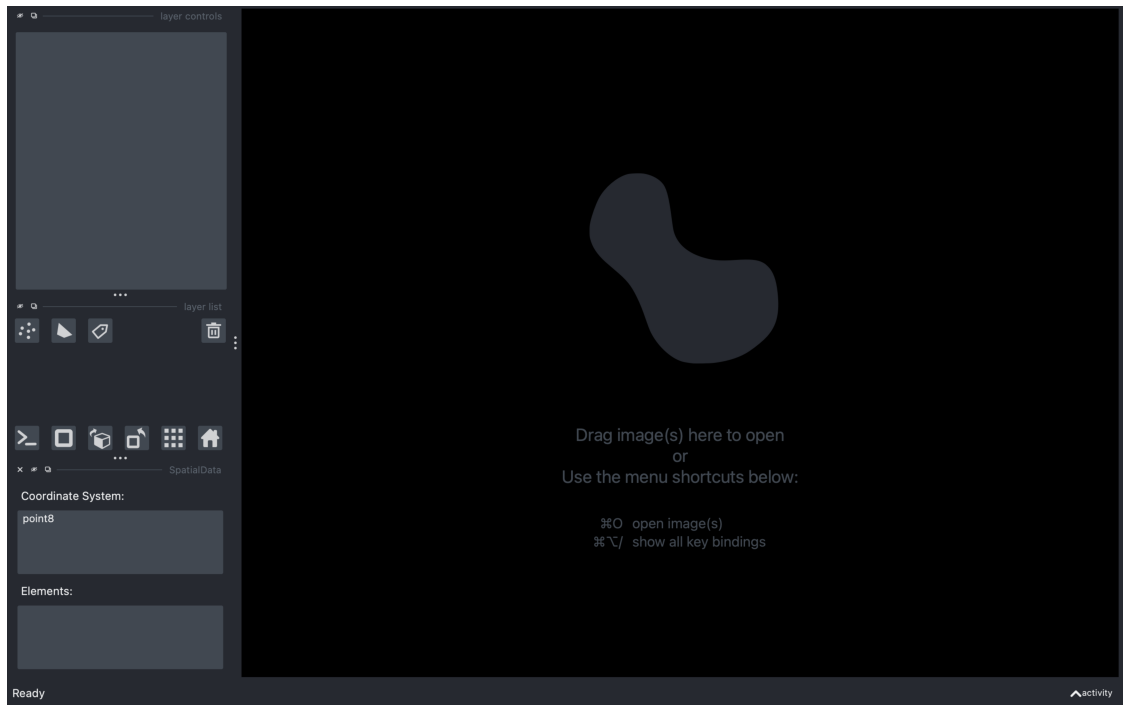

In [12]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We select the coordinate system "point8" and load the elements "point8_image" and "point8_labels" into the viewer.

(-0.5, 2559.5, 1601.5, -0.5)

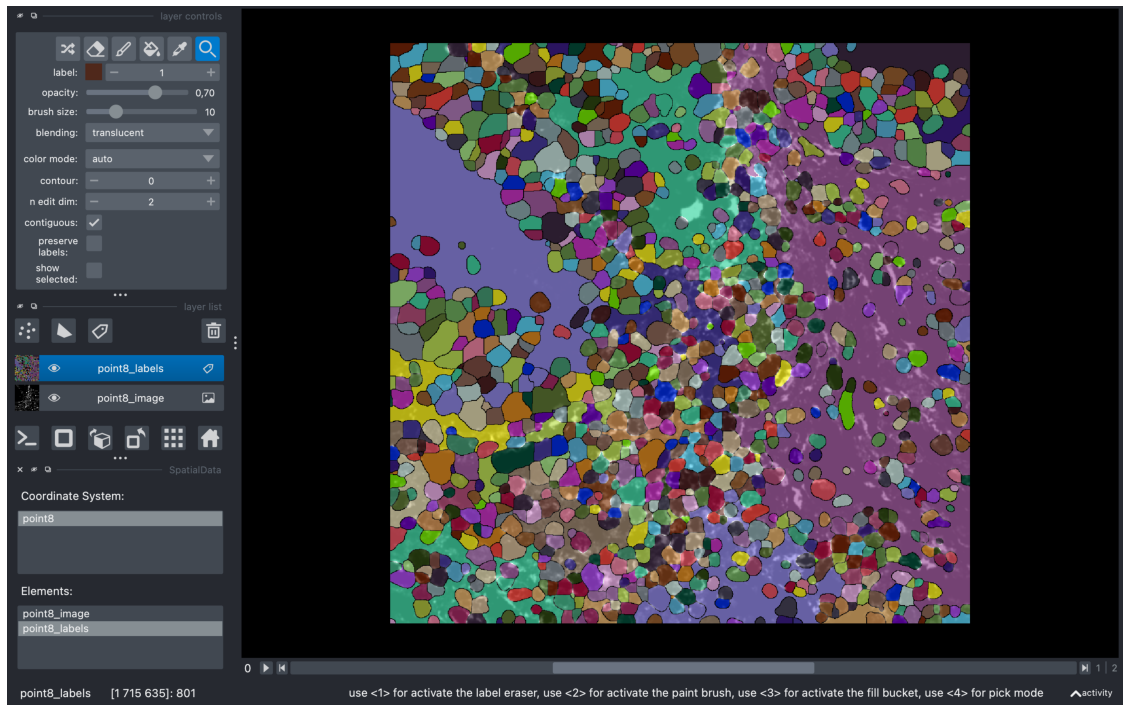

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:107: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current


In [13]:
plt.imshow(interactive.screenshot())
plt.axis('off')

Select "point8_labels" in the list of layers. Then, we open the "Scatter" Widget by using the menu bar and going to Plugins > napari-spatialdata > Scatter. This loads the AnnData object associated with that layer into the "Scatter" Widget.

(-0.5, 2559.5, 1601.5, -0.5)

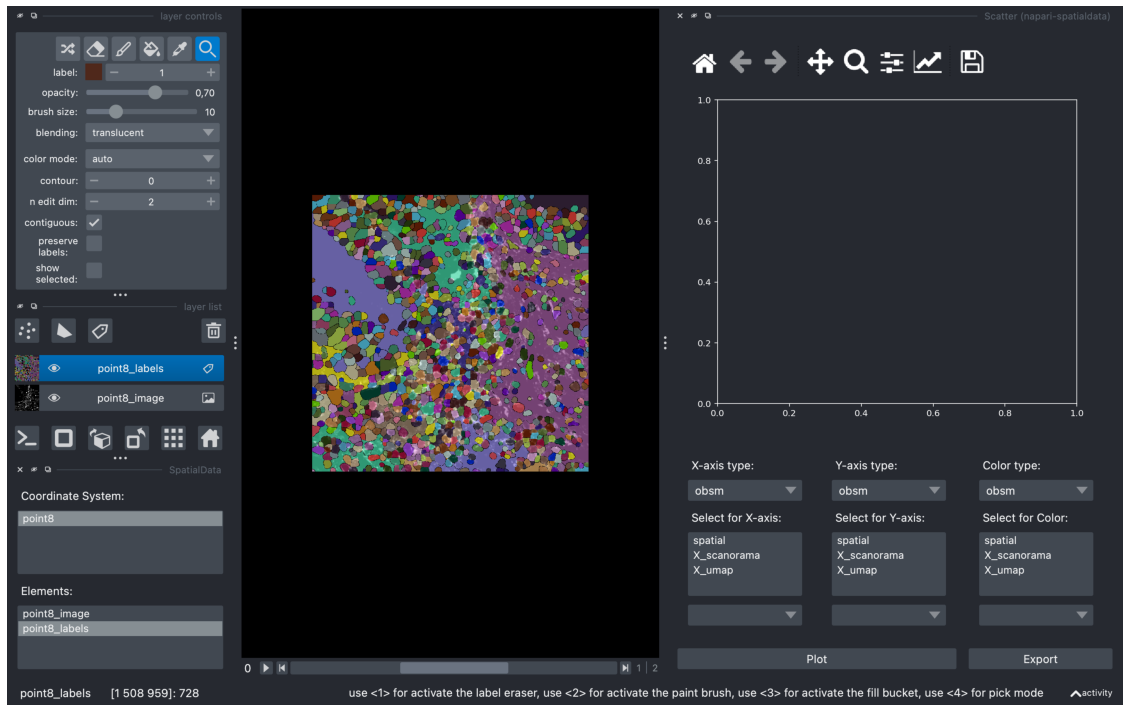

In [14]:
plt.imshow(interactive.screenshot())
plt.axis('off')

Then, as previously, we can now pick specific x-axis, y-axis and color values to visualise in the scatterplot. In the example below, we're visualising the UMAP (Uniform Manifold Approximation and Projection) coordinates of two different axes and coloring it by cell size.

(-0.5, 2559.5, 1601.5, -0.5)

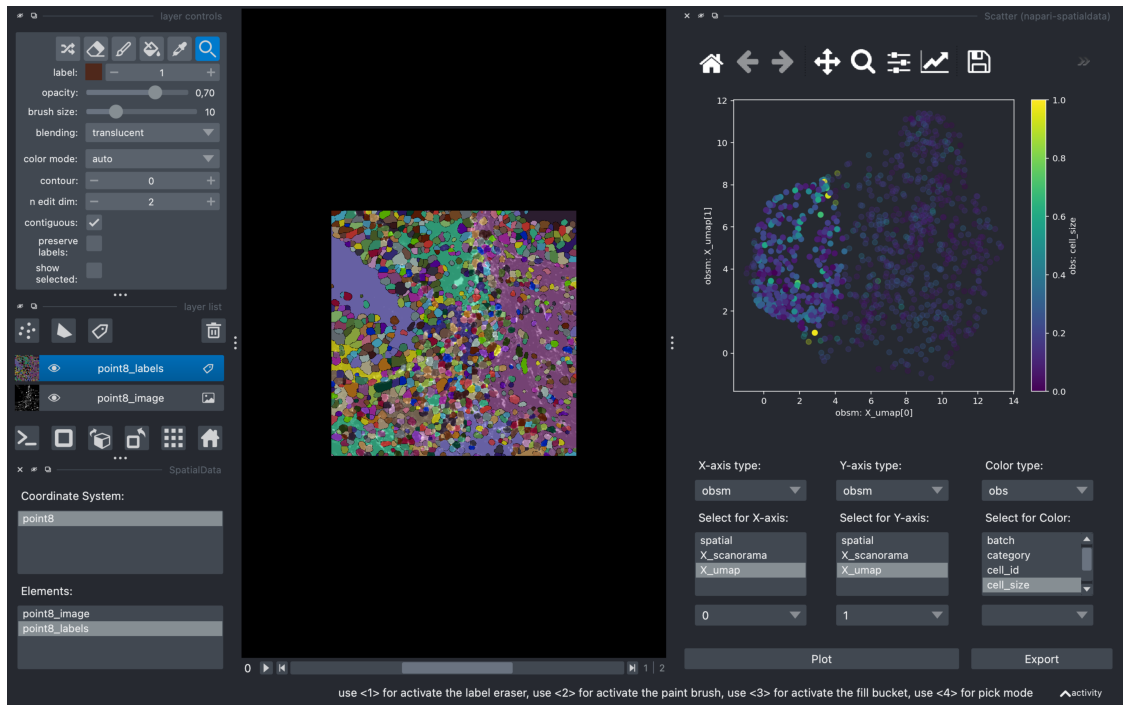

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_scatterwidgets.py:96: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_name] = self.exported_data
2023-05-04 12:33:08.462 | INFO     | napari_spatialdata._scatterwidgets:export:97 - Exported selected coordinates to obs in AnnData as: point8_labels_LASSO_SELECTED
/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current


In [21]:
plt.imshow(interactive.screenshot())
plt.axis('off')

After plotting, as mentioned in the previous sections, it is possible to interactively select clusters and export it to AnnData.

In the example below, we used the cursor to select a cluster on the left half of the scatterplot. We can export it into AnnData by clicking on the "Export" button.

(-0.5, 2559.5, 1601.5, -0.5)

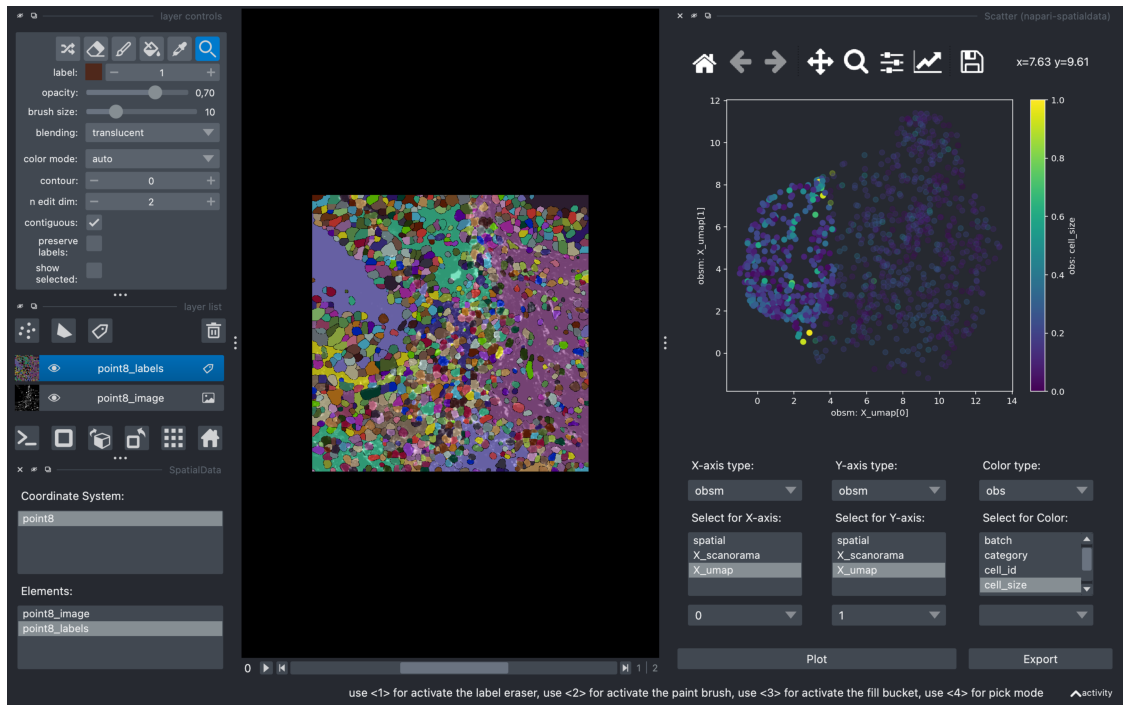

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current


In [17]:
plt.imshow(interactive.screenshot())
plt.axis('off')

After exporting, we can now view the selected points with the View widget. Close the Scatter Widget and from the menu bar, go to Plugins > napari-spatialdata > View. You should be able to observe "point8_labels_LASSO_SELECTED" under "Observations:". This is selected points we exported in the previous step.

(-0.5, 2559.5, 1857.5, -0.5)

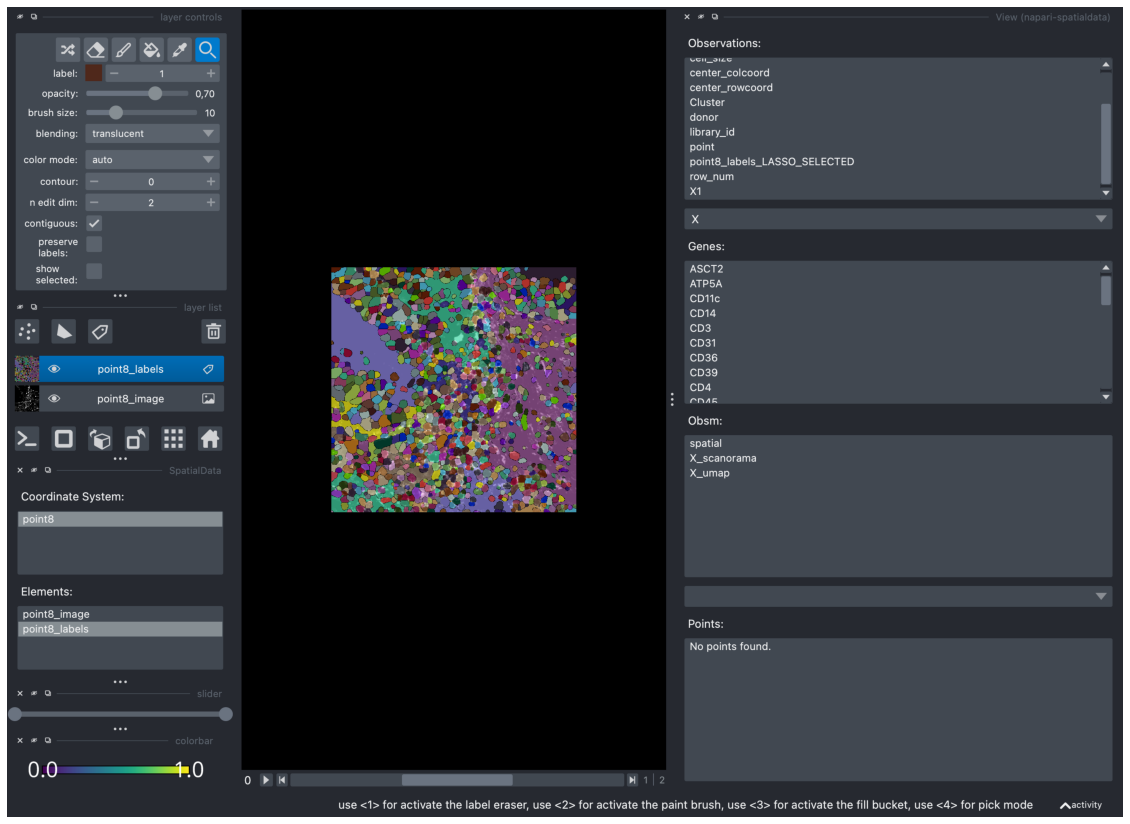

In [22]:
plt.imshow(interactive.screenshot())
plt.axis('off')

Double clicking on "point8_labels_LASSO_SELECTED" loads it as a layer in the Napari viewer.

(-0.5, 2559.5, 1857.5, -0.5)

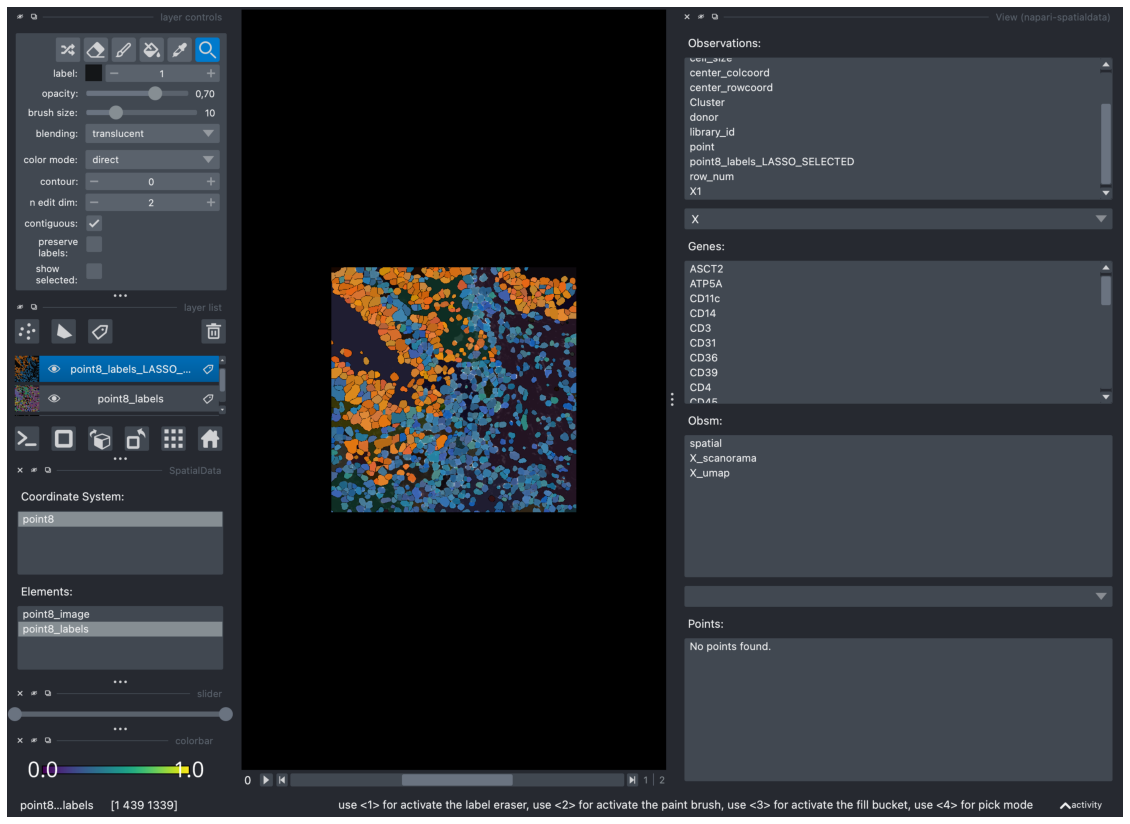

In [24]:
plt.imshow(interactive.screenshot())
plt.axis('off')